<a href="https://colab.research.google.com/github/Chirag314/EDA/blob/main/titanic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import missingno
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
#from catboost import CatBoostClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle 
!cp train.csv ~/.kaggle
!cp test.csv ~/.kaggle
!chmod 600 ~/.kaggle/train.csv
!chmod 600 ~/.kaggle/test.csv


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
#Import data
#train=pd.read_csv(r'C:/Input/Titanic/train.csv')
import os
trainfile='train.csv'

train = pd.read_csv(trainfile)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# checking the missing values
train.isnull().sum()
#We can see that Age has 177 missing values out of 891. Thus we can do the missing values imputation. However, let’s leave it for the next advanced tutorial. For now, let’s not take the Age column. So for model input, we will have only Passenger class and Sex. The output is the Survived field.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# lets onlytake two columns for ease in alaysis
train_x=train[["Pclass", "Sex","SibSp","Parch","Fare","Age"]]#Cabin","Embarked"]]
train_x.head()

,Pclass,Sex,SibSp,Parch,Fare,Age
0,3,male,1,0,7.2500,22.0
1,1,female,1,0,71.2833,38.0
2,3,female,0,0,7.9250,26.0
3,1,female,1,0,53.1000,35.0
4,3,male,0,0,8.0500,35.0


In [ ]:
# Selecting output variable
train_y= train[["Survived"]]
train_y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
# Cleaning of the data
train_x["Sex"].replace("male",1,inplace=True)
train_x["Sex"].replace("female",0,inplace=True)
train_x.head()

,Pclass,Sex,SibSp,Parch,Fare,Age
0,3,1,1,0,7.2500,22.0
1,1,0,1,0,71.2833,38.0
2,3,0,0,0,7.9250,26.0
3,1,0,1,0,53.1000,35.0
4,3,1,0,0,8.0500,35.0


In [ ]:
# Splitting dataset
tr_x, cv_x, tr_y, cv_y=train_test_split(train_x, train_y,test_size=0.2)
len(tr_x),len(cv_x),len(tr_y),len(cv_y)

(712, 179, 712, 179)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6718eb5e90>,
      dtype=object)

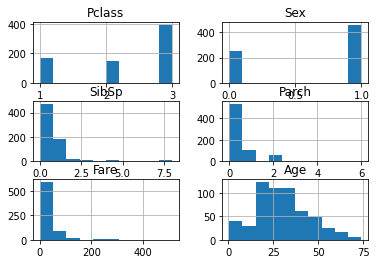

In [ ]:
tr_x.hist()

In [ ]:
#choose and train the model.
rf=RandomForestClassifier()


In [ ]:

#Fit the training and test data
rf.fit(tr_x,tr_y)

ValueError: ignored

In [ ]:
# Evaluate the model
accuracy_randomforest=rf.score(cv_x, cv_y)
print("Accuracy- {}%".format(accuracy_randomforest*100))

Accuracy- 78.2122905027933%


In [ ]:
# Predict the data
test=pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test_x=test[["Pclass", "Sex","SibSp","Parch","Fare","Age"]]
test_x.head()

,Pclass,Sex,SibSp,Parch,Fare,Age
0,3,male,0,0,7.8292,34.5
1,3,female,1,0,7.0000,47.0
2,2,male,0,0,9.6875,62.0
3,3,male,0,0,8.6625,27.0
4,3,female,1,1,12.2875,22.0


In [ ]:
test_x["Sex"].replace("male",1,inplace=True)
test_x["Sex"].replace("female",0,inplace=True)
test_x.head()

,Pclass,Sex,SibSp,Parch,Fare,Age
0,3,1,0,0,7.8292,34.5
1,3,0,1,0,7.0000,47.0
2,2,1,0,0,9.6875,62.0
3,3,1,0,0,8.6625,27.0
4,3,0,1,1,12.2875,22.0


In [ ]:
prd=rf.predict(test_x)
prd

ValueError: ignored

In [ ]:
op=test[["PassengerId"]]
op['Survived']=prd
op.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
op.to_csv("Submission.csv", index=False)

In [ ]:
tr_x


,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked
376,3,0,0,0,7.2500,NaN,S
310,1,0,0,0,83.1583,C54,C
632,1,1,0,0,30.5000,B50,C
737,1,1,0,0,512.3292,B101,C
416,2,0,1,1,32.5000,NaN,S
...,...,...,...,...,...,...,...
631,3,1,0,0,7.0542,NaN,S
68,3,0,4,2,7.9250,NaN,S
145,2,1,1,1,36.7500,NaN,S
268,1,0,0,1,153.4625,C125,S


In [ ]:
#USe NN to predict survival rate

# Set random seed
tf.random.set_seed(42)

# Create a model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(60, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(40, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
 tf.keras.layers.Dense(20, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation 
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# Fit the model
history = model_1.fit(tr_x, tr_y, epochs=50,validation_data=(cv_x, cv_y))
model_1.evaluate(tr_x,tr_y)

Epoch 1/50
23/23 [==============================] - 1s 10ms/step - loss: nan - accuracy: 0.6264 - val_loss: nan - val_accuracy: 0.5810
Epoch 2/50
23/23 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.6250 - val_loss: nan - val_accuracy: 0.5810
Epoch 3/50
23/23 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.6250 - val_loss: nan - val_accuracy: 0.5810
Epoch 4/50
23/23 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.6250 - val_loss: nan - val_accuracy: 0.5810
Epoch 5/50
23/23 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.6250 - val_loss: nan - val_accuracy: 0.5810
Epoch 6/50
23/23 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6250 - val_loss: nan - val_accuracy: 0.5810
Epoch 7/50
23/23 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.6250 - val_loss: nan - val_accuracy: 0.5810
Epoch 8/50
23/23 [==============================] - 0s 4ms/st

[nan, 0.625]

In [ ]:
# Use logistic regression 
lgr=LogisticRegression()
lgr.fit(tr_x,tr_y)

LogisticRegression()

In [ ]:
accuracy=lgr.score(cv_x,cv_y)
print("Accuracy ={}%".format(accuracy*100))

Accuracy =80.44692737430168%


In [ ]:
# Predict for logistic regression
prl=lgr.predict(test_x)
prl

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
op2=test[['PassengerId']]
op2['Survived']=prl
op2.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
op2.to_csv("Submission2.csv",index=False)